In [4]:
install.packages("igraph")
library(igraph)


The downloaded binary packages are in
	/var/folders/m6/4mgxnhd5575fll1p8n3_wcjc0000gn/T//RtmpZKdGNx/downloaded_packages



Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




QUESTION 1A: Create undirected random networks with n = 1000 nodes, and the probability p for drawing an edge between two arbitrary vertices 0.003, 0.004, 0.01, 0.05, and 0.1. Plot the degree distributions. What distribution is observed? Explain why. Also, report the mean and variance of the degree distributions and compare them to the theoretical values.

In [12]:
probs = c(0.003, 0.004, 0.01, 0.05, 0.1)

[1] "Analytical mean of the degree distribution is : 3"
[1] "Simulated mean of the degree distribution is : 3.026"
[1] "Analytical variance of the  degree distribution is : 2.991"
[1] "Simulated variance of the  degree distribution is : 2.68801201201201"


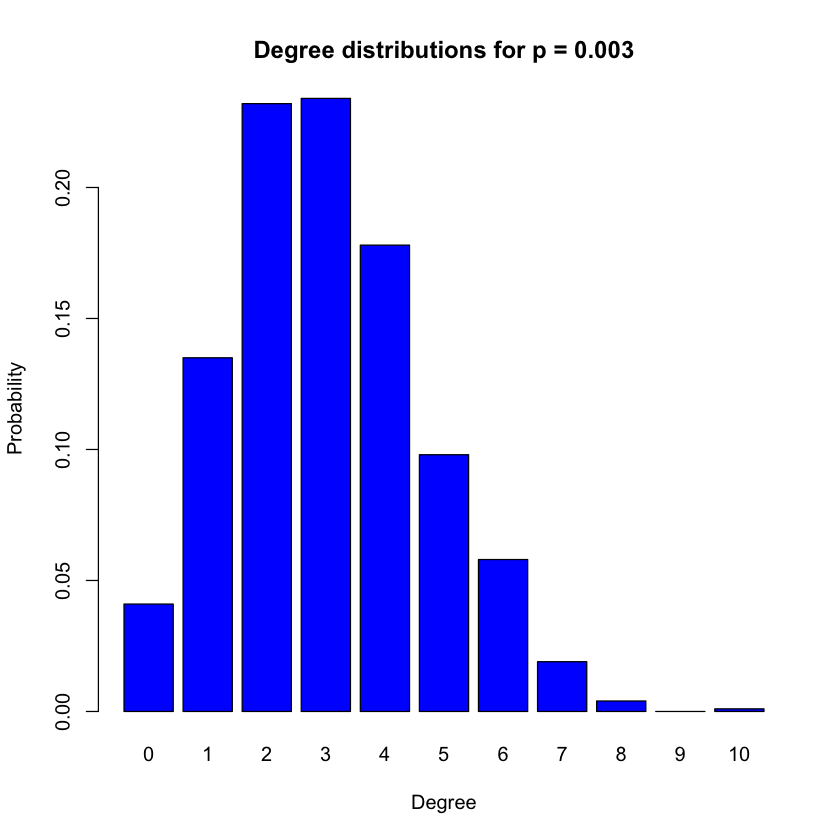

[1] "Analytical mean of the degree distribution is : 4"
[1] "Simulated mean of the degree distribution is : 4.058"
[1] "Analytical variance of the  degree distribution is : 3.984"
[1] "Simulated variance of the  degree distribution is : 4.18081681681682"


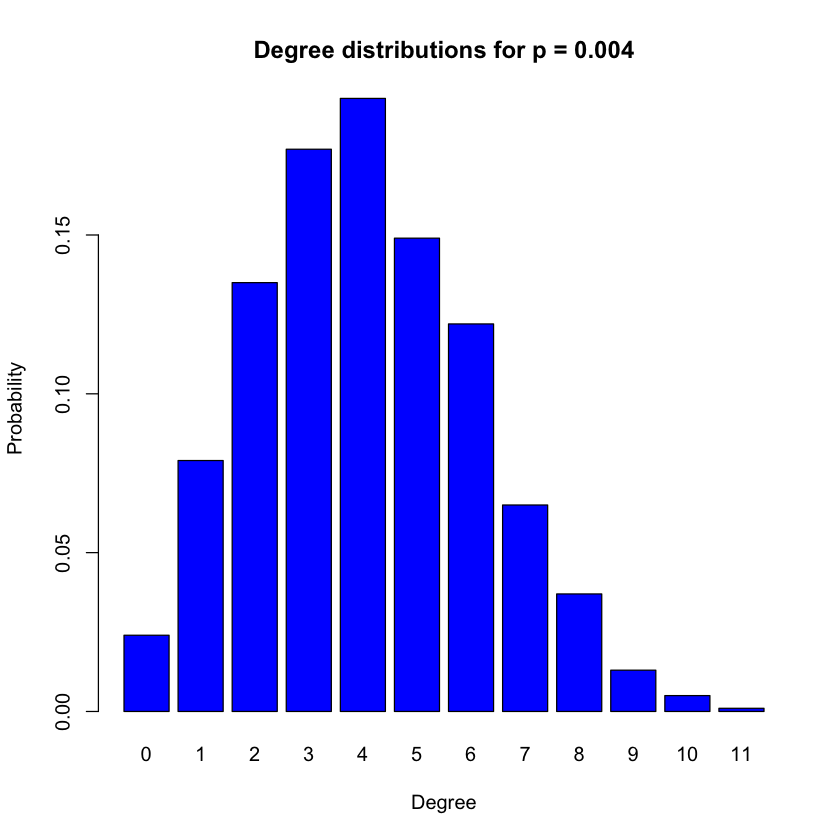

[1] "Analytical mean of the degree distribution is : 10"
[1] "Simulated mean of the degree distribution is : 10.09"
[1] "Analytical variance of the  degree distribution is : 9.9"
[1] "Simulated variance of the  degree distribution is : 10.3562562562563"


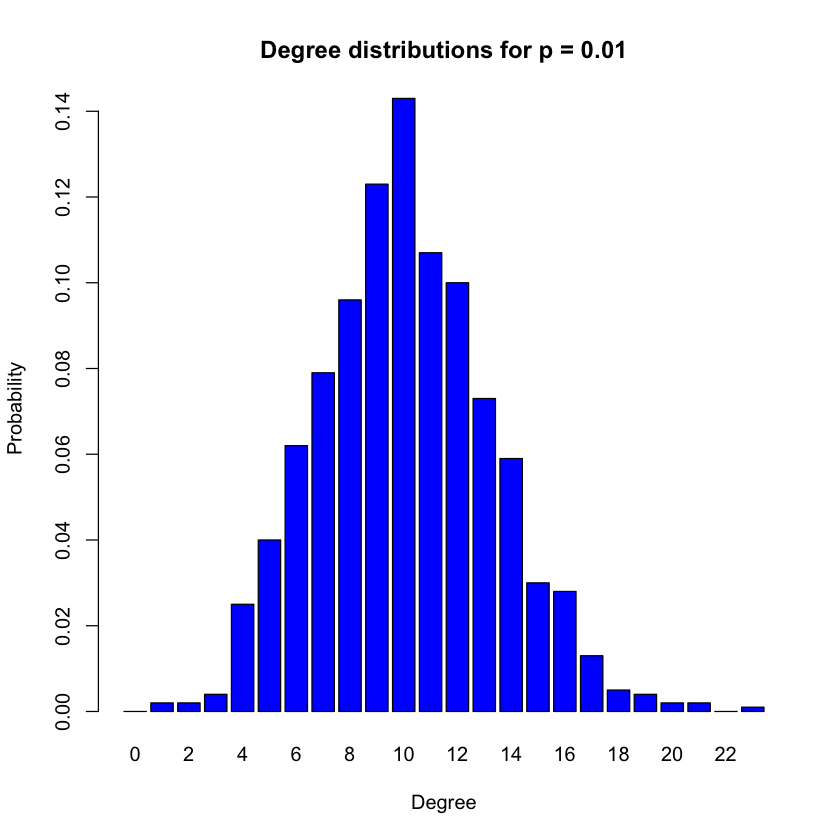

[1] "Analytical mean of the degree distribution is : 50"
[1] "Simulated mean of the degree distribution is : 49.862"
[1] "Analytical variance of the  degree distribution is : 47.5"
[1] "Simulated variance of the  degree distribution is : 46.9178738738739"


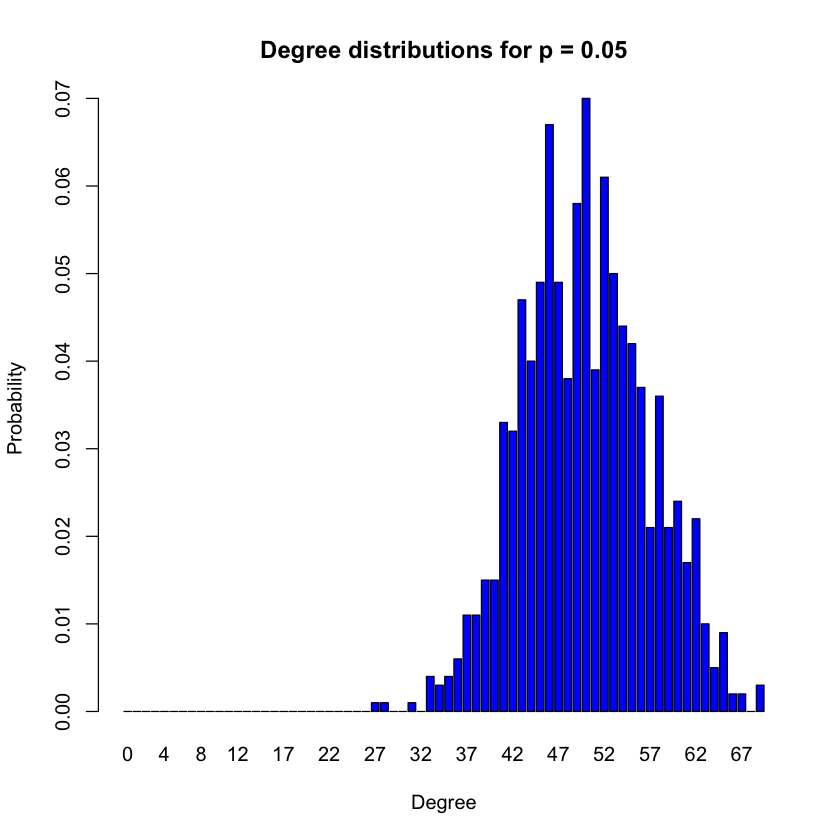

[1] "Analytical mean of the degree distribution is : 100"
[1] "Simulated mean of the degree distribution is : 100.384"
[1] "Analytical variance of the  degree distribution is : 90"
[1] "Simulated variance of the  degree distribution is : 92.487031031031"


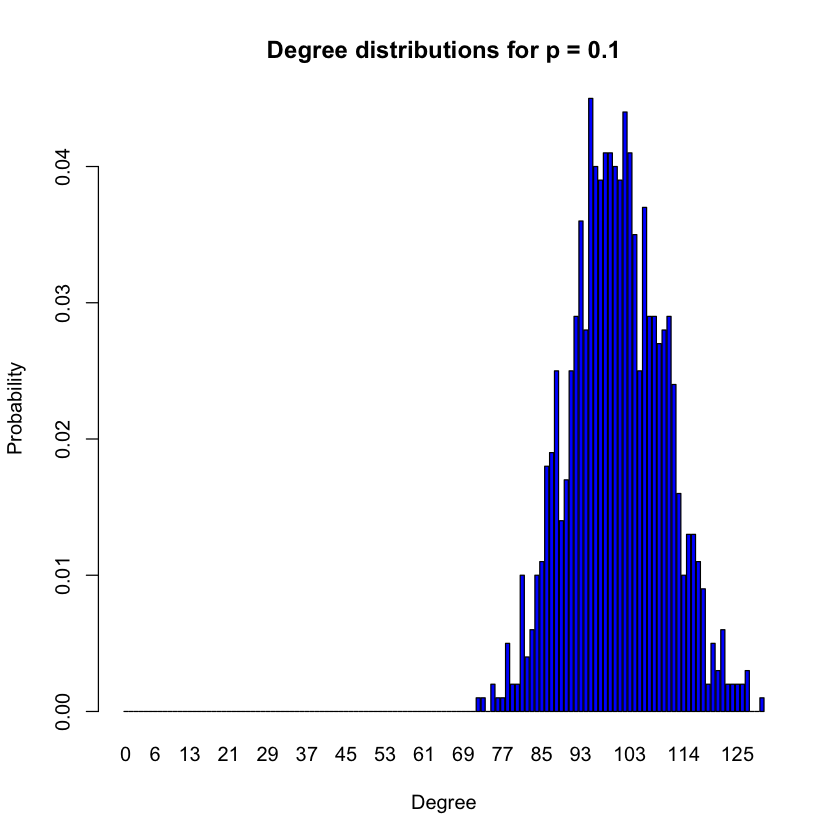

In [18]:
num_nodes <- 1000
for (p in probs){
    graph = sample_gnp(num_nodes, p, directed=FALSE)
    node_deg_dist = degree.distribution(graph)
    xVals = c(0: (length(node_deg_dist)-1))
    barplot(node_deg_dist, names.arg=xVals, xlab="Degree", ylab="Probability",
        main = paste("Degree distributions for p =", p, sep = " "),col="blue")
    
    analytical_mean = num_nodes * p
    analytical_variance = num_nodes * p * (1-p)
    simulated_mean = mean(degree(graph))
    simulated_variance = var(degree(graph))
    print(paste("Analytical mean of the degree distribution is",":", analytical_mean))
    print(paste("Simulated mean of the degree distribution is",":", simulated_mean))
    print(paste("Analytical variance of the  degree distribution is",":", analytical_variance))
    print(paste("Simulated variance of the  degree distribution is",":", simulated_variance))
}


These are binomial distributions since a given node $v_i$ has n-1 possible nodes it can form an edge with where n is the total number of nodes in the network. Among these, it picks k nodes to form edges. The equation for this turns out to be
$P(deg(v_i)=k)={n-1 \choose k}p^k (1-p)^{n-1-k}$ which is of the form of a binomial distribution.

QUESTION 1B: For each p and n = 1000, answer the following questions:
Are all random realizations of the ER network connected? Numerically estimate the
probability that a generated network is connected. For one instance of the networks
with that p, find the giant connected component (GCC) if not connected. What is
the diameter of the GCC?